+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 0 Total Reward: -524
Episode 50 Total Reward: -43
Episode 100 Total Reward: -137
Episode 150 Total Reward: -29
Episode 200 Total Reward: 11
Episode 250 Total Reward: 13
Episode 300 Total Reward: 7
Episode 350 Total Reward: 0
Episode 400 Total Reward: 9
Episode 450 Total Reward: 7
Episode 500 Total Reward: 2
Episode 550 Total Reward: 7
Episode 600 Total Reward: 8
Episode 650 Total Reward: 12
Episode 700 Total Reward: 11
Episode 750 Total Reward: 11
Episode 800 Total Reward: 10
Episode 850 Total Reward: 7
Episode 900 Total Reward: 7
Episode 950 Total Reward: 7


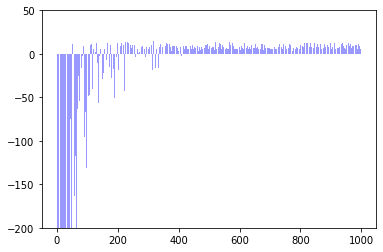

In [1]:
import gym
import numpy as np

env = gym.make("Taxi-v2")
Q = np.zeros([env.observation_space.n, env.action_space.n])
G = 0
dis = 0.618
env.render()
rList =[]
for episode in range(1000 ):
    done = False
    G, reward = 0, 0
    state = env.reset()
    # print(state)

    while done != True:
        action = np.argmax(Q[state])
        state2, reward, done, info = env.step(action)
        # Q[state, action] += dis * (reward + np.max(Q[state2]) - Q[state, action])
        Q[state, action]  = dis * (reward + np.max(Q[state2])  )

        # print(action, state2, reward )
        G += reward
        state = state2
        # env.render()
 
    rList.append(G)

    if episode % 50 == 0:
        print('Episode {} Total Reward: {}'.format(episode, G))

import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.ylim(-200,50)
plt.show()